# Hypothesis Test

In [199]:
from scipy import stats as stat
from matplotlib import pyplot as plt
import numpy as np
import random as rnd
import seaborn as sns
import pandas as pd
import os
import math

%matplotlib inline

In [200]:
# define functions

def ConfidenceInterval(mean, sigma, alpha=0.05, n=30, k=5, alternative = 'ne'):
    ''' for drawing probability distribution plot '''
    x = np.linspace(mean-k*sigma, mean+k*sigma, 1000)
    y = []
    cil, cih = mean, mean
    statistic = 0.

    if (alternative == 'ne'):
        alpha = alpha / 2
        
    if (alternative == 'gt'):
        alpha = 1 - alpha

    if (n<30):
        y = stat.t.pdf(x,n-1,mean,sigma)
        statistic = abs(stat.t.ppf(alpha, n-1))
    else:
        y = stat.norm.pdf(x, mean, sigma)
        statistic = abs(stat.norm.ppf(alpha))

    if (alternative == 'lt'):
        cil = mean-statistic*sigma
        cih = math.inf
    if (alternative == 'ne'):
        cil = mean-statistic*sigma
        cih = mean+statistic*sigma
    if (alternative == 'gt'):
        cil = -math.inf
        cih = mean+statistic*sigma

    return x, y, cil, cih

def TestOfHypothesisForOneSampleMean(mu, sigma, xbar, n, alternative = 'ne'):
    ''' One Sample t or Z Test
        \param mu is a population mean
        \param sigma is a population sigma or sample sigma
        \param xbar is a sample mean
        \param n is a sample size
        \param alternative is which a condition that less than is 'lt' or not equal is 'ne' or greater than is 'gt'
        \return mean test type and test statistic and p-value
    '''
    pval = 0.
    stderror = sigma/math.sqrt(n)
    statistic = (xbar-mu)/(stderror)
    if (n<30):
        pval = stat.t.cdf(xbar, n-1, mu, stderror)
    else:
        pval = stat.norm.cdf(xbar, mu, stderror)

    return MeanTestType(n), statistic, CalcPvalue(pval, alternative)

def MeanTestType(n):
    ''' return test type by sample size '''
    test_type = ''
    if (n<30):
        test_type = 't'
    else:
        test_type ='Z'
    return test_type

def CalcPvalue(pvalue, alternative = 'ne'):
    if (alternative == 'gt'):
        pvalue = 1-pvalue        
    if (alternative == 'ne'):
        if (pvalue > 0.5):
            pvalue = 2*(1-pvalue)
        else:
            pvalue = 2*pvalue
    
    return pvalue

## Test of 1 Sample Z or t

Mu:60.000, Sigma:10.000, StdError:4.472
Critical Level LOW:47.583, HIGH:72.417
X Mean:61.763, StdDev:6.844, n:5 
Confidence Interval LOW:40.063, HIGH:64.897
Significance Level:0.05, Confidence Level:95.0%, Alternative:ne
t Test Statistic:0.394, p-value:0.713


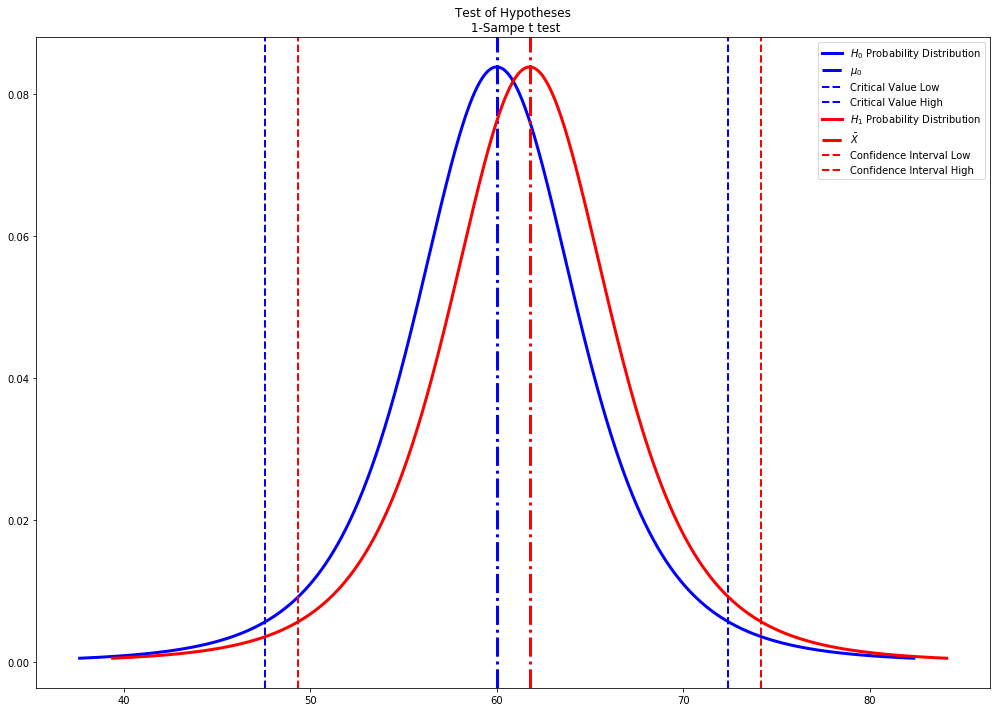

In [202]:
# population parameters
mu = 60
sigma = 10
# sample
n = 5
r = stat.norm.rvs(mu,sigma,n) # generate random values
xbar = np.mean(r)
xsig = np.std(r, ddof=1)
stderror = sigma/math.sqrt(n)
alternative = 'ne'  # less than is lt or not equal is ne or greater than is gt

# critical level
alpha = 0.05

# sampling distribution
x, y, cvl, cvh = ConfidenceInterval(mu, stderror, alpha=alpha, n=n, alternative=alternative)
x_sample, y_sample, cil, cih = ConfidenceInterval(xbar, stderror, alpha = alpha, n=n, alternative=alternative)
test_type, res, pval = TestOfHypothesisForOneSampleMean(mu, sigma, xbar, n, alternative)

# Draw Plot
plt.figure(figsize=(14,10))
# Sampling probability distribution
# Null
plt.plot(x, y, 'b-', linewidth=3, label=r'A sampling distribution')
plt.axvline(x=mu, color='b', linewidth=3, linestyle='-.', label = r'$\mu_0$')
# Critical Value Low, HIgh
if (alternative == 'lt'):
    plt.axvline(x=cvl, color='b', linewidth=2, linestyle='--', label = "Critical Value Low")
if (alternative == 'ne'):
    plt.axvline(x=cvl, color='b', linewidth=2, linestyle='--', label = "Critical Value Low")
    plt.axvline(x=cvh, color='b', linewidth=2, linestyle='--', label = "Critical Value High")
if (alternative == 'gt'):
    plt.axvline(x=cvh, color='b', linewidth=2, linestyle='--', label = "Critical Value High")
# Alternative
plt.plot(x_sample, y_sample, 'r-', linewidth=3, label=r'Probability Distribution ot a Sampling mean')
plt.axvline(x=xbar, color='r', linewidth=3, linestyle='-.', label = r'$\bar{X}$')
if (alternative == 'lt'):
    plt.axvline(x=cih, color='r', linewidth=2, linestyle='--', label = "Confidence Interval High")
if (alternative == 'ne'):
    plt.axvline(x=cil, color='r', linewidth=2, linestyle='--', label = "Confidence Interval Low")
    plt.axvline(x=cih, color='r', linewidth=2, linestyle='--', label = "Confidence Interval High")
if (alternative == 'gt'):
    plt.axvline(x=cil, color='r', linewidth=2, linestyle='--', label = "Confidence Interval Low")    

plt.legend()
plt.title('Test of Hypotheses\n 1-Sampe {} test'.format(test_type))
plt.tight_layout()
# Print out statistic
print("Mu:{0:.3f}, Sigma:{1:.3f}, StdError:{2:.3f}".format(mu, sigma, sigma/math.sqrt(n)))
print("Critical Value LOW:{0:.3f}, HIGH:{1:.3f}".format(cl,ch))
print("X Mean:{0:.3f}, StdDev:{1:.3f}, n:{2} ".format(xbar, xsig, n))
print("Confidence Interval LOW:{0:.3f}, HIGH:{1:.3f}".format(cil_sample,cih_sample))
print("Significance Level:{0}, Confidence Level:{1}%, Alternative:{2}".format(alpha, 100*(1-alpha), alternative))
print("{0} Test Statistic:{1:.3f}, p-value:{2:.3f}".format(test_type, res, pval))
plt.show()

## 2 Sample t test

Sample $X_1$ and $X_2$

In [212]:
# x1
x1_mean = 10
x1_sigma = 2
x1_size = 20
x1 = stat.norm.rvs(x1_mean,x1_sigma,x1_size) # generate random values
x1_mean = np.mean(x1)
x1_sigma = np.std(x1, ddof=1)
# x2
x2_mean = 10
x2_sigma = 3
x2_size = 15
x2 = stat.norm.rvs(x2_mean,x2_sigma,x2_size) # generate random values
x2_mean = np.mean(x2)
x2_sigma = np.std(x2, ddof=1)

In [213]:
print(x1)
stat.describe(x1)

[ 8.82624008 10.01496851  8.86704017 10.66914882  9.15048625 12.64119885
  6.72604674 13.21410529  8.27619431  5.72528378  8.46137757  9.95954425
  8.42818203  7.98815303 10.13312505  9.15236152  9.94992532  9.62098912
  9.82717104  6.30357246]


DescribeResult(nobs=20, minmax=(5.725283779512597, 13.214105294628668), mean=9.196755710383695, variance=3.3505142816718405, skewness=0.23633605369094576, kurtosis=0.2773281985620244)

In [214]:
print(x2)
stat.describe(x2)

[13.85385794 11.37148267  8.59201388 14.11123257  8.50006901  8.82047548
  9.71833076 12.86541363 10.73711453  9.03667038 10.22633109 14.45555709
 11.69538291  9.59684177 10.29853465]


DescribeResult(nobs=15, minmax=(8.500069008832174, 14.455557085864843), mean=10.925287224077982, variance=4.229074311193932, skewness=0.5234696075754285, kurtosis=-1.0800926055776845)

In [ ]:
# difference between 2 sample means
sigma_diff = 0.
test_type = ''
df = 0
if (x1_size < 30 || x2_size < 30):
    test_type = 't'
    sp_sqr = ((x1_size-1)*x1_sigma**2+(x2_size-1)*x2_sigma**2)/(x1_size+x2_size-2)
    sigma_diff = math.sqrt(sp_sqr*(1/x1_size+1/x2_size))
    df = int((x1_sigma**2/x1_size+x2_sigma**2/x2_size)**2/((x1_sigma**2/x1_size)**2/((x1_sigma**2/x1_size)**2/(x1_size-1)+(x2_sigma**2/x2_size)**2(x2_size-1)))
else:
    test_type = 'Z'
    sigma_diff = math.sqrt(x1_sigma**2/x1_size+x2_sigma**2/x2_size)

mean_diff = x1_mean - x2_mean
statistic = mean_diff/sigma_diff
# less than is lt or not equal is ne or greater than is gt
alternative = 'ne'
# significance leval
alpha = 0.05

# sampling distribution
x, y, cl, ch = ConfidenceInterval(0, sigma_diff, alpha=alpha, n=df, alternative=alternative)
x_sample, y_sample, cil_sample, cih_sample = ConfidenceInterval(mean_diff, sigma_diff, alpha = alpha, n=df, alternative=alternative)
test_type, res, pval = TestOfHypothesisForOneSampleMean(mu, sigma, xbar, n, alternative)

# Draw Plot
plt.figure(figsize=(14,10))
# Sampling probability distribution
# Null
plt.plot(x, y, 'b-', linewidth=3, label=r'$H_0$ Probability Distribution')
plt.axvline(x=mu, color='b', linewidth=3, linestyle='--', label = r'$\mu_0$')
if (alternative == 'lt'):
    plt.axvline(x=cl, color='b', linewidth=2, linestyle='--', label = "Critical Value Low")
if (alternative == 'ne'):
    plt.axvline(x=cl, color='b', linewidth=2, linestyle='--', label = "Critical Value Low")
    plt.axvline(x=ch, color='b', linewidth=2, linestyle='--', label = "Critical Value High")
if (alternative == 'gt'):
    plt.axvline(x=ch, color='b', linewidth=2, linestyle='--', label = "Critical Value High")
# Alternative
plt.plot(x_sample, y_sample, 'r-', linewidth=3, label=r'$H_1$ Probability Distribution')
plt.axvline(x=xbar, color='r', linewidth=3, linestyle='--', label = r'$\bar{X}$')

plt.legend()
plt.title('Test of Hypotheses\n 1-Sampe {} test'.format(test_type))
plt.tight_layout()
# Print out statistic
print("Mu:{0:.3f}, Sigma:{1:.3f}, StdError:{2:.3f}".format(mu, sigma, sigma/math.sqrt(n)))
print("Critical Level LOW:{0:.3f}, HIGH:{1:.3f}".format(cl,ch))
print("X Mean:{0:.3f}, StdDev:{1:.3f}, n:{2} ".format(xbar, xsig, n))
print("Confidence Interval LOW:{0:.3f}, HIGH:{1:.3f}".format(cil_sample,cih_sample))
print("alpha:{0}, alternative:{1}".format(alpha, alternative))
print("{0} Test Statistic:{1:.3f}, p-value:{2:.3f}".format(test_type, res, pval))
plt.show()

## Paried t test

## 1 Variance

## 2 Variance